In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

import sys
sys.path.insert(0, '/Users/jonathanhaller/Documents/Studium/Master/Verfahren_der_KI/KI_Projekt/repo/KI_Projekt/Neural_net')
from main import load_ritter_sport_xy, get_mean_error

In [63]:
X_train, X_test, y_train, y_test = load_ritter_sport_xy("../Image_proc/data_with_features_with_colour.csv")
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
train_mean = np.mean(X_train)
train_std = np.std(X_train)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
X_val = (X_val - train_mean) / train_std

In [94]:
model = Sequential()
model.add(Dense(X_train.shape[1]))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [95]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_val, y_val), batch_size = 32)

Epoch 1/120
64/64 [==============================] - 1s 16ms/step - loss: 2.5208 - accuracy: 0.1306 - val_loss: 2.3759 - val_accuracy: 0.1444
Epoch 2/120
64/64 [==============================] - 1s 13ms/step - loss: 2.3120 - accuracy: 0.1919 - val_loss: 2.2988 - val_accuracy: 0.1806
Epoch 3/120
64/64 [==============================] - 1s 13ms/step - loss: 2.2768 - accuracy: 0.2003 - val_loss: 2.2801 - val_accuracy: 0.1806
Epoch 4/120
64/64 [==============================] - 1s 14ms/step - loss: 2.2588 - accuracy: 0.2116 - val_loss: 2.2714 - val_accuracy: 0.2139
Epoch 5/120
64/64 [==============================] - 1s 14ms/step - loss: 2.2628 - accuracy: 0.2126 - val_loss: 2.2790 - val_accuracy: 0.1778
Epoch 6/120
64/64 [==============================] - 1s 12ms/step - loss: 2.2532 - accuracy: 0.2081 - val_loss: 2.2698 - val_accuracy: 0.1889
Epoch 7/120
64/64 [==============================] - 1s 12ms/step - loss: 2.2545 - accuracy: 0.2091 - val_loss: 2.2622 - val_accuracy: 0.2000
Epoch 

64/64 [==============================] - 1s 12ms/step - loss: 2.0951 - accuracy: 0.2882 - val_loss: 2.2633 - val_accuracy: 0.2361
Epoch 59/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0997 - accuracy: 0.2970 - val_loss: 2.2958 - val_accuracy: 0.2194
Epoch 60/120
64/64 [==============================] - 1s 12ms/step - loss: 2.1064 - accuracy: 0.2936 - val_loss: 2.2483 - val_accuracy: 0.3417
Epoch 61/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0844 - accuracy: 0.2990 - val_loss: 2.2512 - val_accuracy: 0.3111
Epoch 62/120
64/64 [==============================] - 1s 13ms/step - loss: 2.0834 - accuracy: 0.3058 - val_loss: 2.2556 - val_accuracy: 0.2917
Epoch 63/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0972 - accuracy: 0.3054 - val_loss: 2.3188 - val_accuracy: 0.2861
Epoch 64/120
64/64 [==============================] - 1s 13ms/step - loss: 2.0973 - accuracy: 0.2980 - val_loss: 2.2541 - val_accuracy: 0.2667
Epoch 65/120

64/64 [==============================] - 1s 12ms/step - loss: 2.0717 - accuracy: 0.3176 - val_loss: 2.2908 - val_accuracy: 0.2667
Epoch 116/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0763 - accuracy: 0.3093 - val_loss: 2.2739 - val_accuracy: 0.2944
Epoch 117/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0692 - accuracy: 0.2995 - val_loss: 2.2829 - val_accuracy: 0.2583
Epoch 118/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0741 - accuracy: 0.3044 - val_loss: 2.2717 - val_accuracy: 0.2722
Epoch 119/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0756 - accuracy: 0.3162 - val_loss: 2.2831 - val_accuracy: 0.2667
Epoch 120/120
64/64 [==============================] - 1s 12ms/step - loss: 2.0728 - accuracy: 0.2995 - val_loss: 2.2735 - val_accuracy: 0.3167


In [96]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 10ms/step - loss: 2.1186 - accuracy: 0.3267


[2.1185872554779053, 0.3266666829586029]

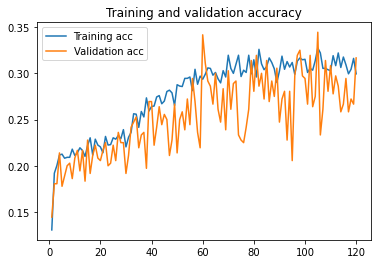

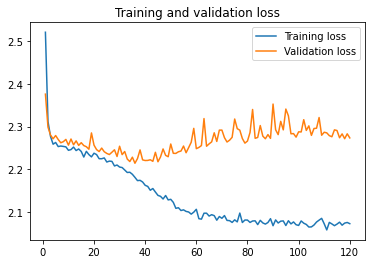

In [98]:
loss = history.history["loss"]
acc = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("NN_TF_loss.svg")

plt.show()

In [108]:
model.save('my_model.h5')

In [104]:
model.predict(X_test)

19/19 [==============================] - 0s 4ms/step


array([[2.84405299e-08, 2.23708394e-05, 4.57728142e-03, ...,
        1.03489205e-01, 4.07803878e-02, 4.56935838e-02],
       [7.62145646e-05, 8.17762595e-03, 7.51147345e-02, ...,
        4.32841368e-02, 1.26364194e-02, 1.30834468e-02],
       [2.93551493e-05, 4.40234464e-04, 2.16372758e-02, ...,
        1.52636711e-02, 5.57414722e-04, 1.06379972e-03],
       ...,
       [2.16019690e-01, 2.94028461e-01, 1.75758183e-01, ...,
        8.67061666e-04, 2.83862973e-05, 4.46784579e-05],
       [1.26140449e-08, 1.12604757e-05, 3.31598381e-03, ...,
        1.09085470e-01, 4.12646607e-02, 4.75920476e-02],
       [7.79310521e-03, 1.03756398e-01, 2.10296512e-01, ...,
        1.05445050e-02, 1.16856396e-03, 1.43451185e-03]], dtype=float32)

In [107]:
print(classification_report(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test), axis=1)))

19/19 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.46      0.77      0.58        39
           2       0.36      0.30      0.33        43
           3       0.23      0.27      0.25        45
           4       0.00      0.00      0.00        43
           5       0.36      0.66      0.47        41
           6       0.75      0.07      0.12        44
           7       0.21      0.70      0.32        33
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        39
          10       0.23      0.47      0.31        32
          11       0.67      0.05      0.10        38
          12       0.32      0.51      0.39        35
          13       0.30      0.64      0.41        39
          14       0.25      0.06      0.09        53

    accuracy                           0.33       600
   macro avg       0.33    

/Users/jonathanhaller/miniforge3/envs/tf_mac_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathanhaller/miniforge3/envs/tf_mac_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathanhaller/miniforge3/envs/tf_mac_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_